In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,346.000000,347.299988,340.149994,344.299988,344.299988,20500542.0
1,2019-06-11,345.049988,348.299988,342.850006,347.100006,347.100006,16281297.0
2,2019-06-12,346.950012,346.950012,342.299988,344.000000,344.000000,11564970.0
3,2019-06-13,343.000000,347.450012,339.799988,346.500000,346.500000,15509948.0
4,2019-06-14,345.500000,346.350006,342.549988,343.799988,343.799988,10347594.0


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
df['Date']=pd.to_datetime(df.Date)

In [5]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,346.000000,347.299988,340.149994,344.299988,344.299988,20500542.0
2019-06-11,345.049988,348.299988,342.850006,347.100006,347.100006,16281297.0
2019-06-12,346.950012,346.950012,342.299988,344.000000,344.000000,11564970.0
2019-06-13,343.000000,347.450012,339.799988,346.500000,346.500000,15509948.0
2019-06-14,345.500000,346.350006,342.549988,343.799988,343.799988,10347594.0


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df=df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'],axis=1)

In [8]:
df.head()

,Close
Date,
2019-06-10,344.299988
2019-06-11,347.100006
2019-06-12,344.000000
2019-06-13,346.500000
2019-06-14,343.799988


In [9]:
df.isnull().sum()
df_1=df.dropna()

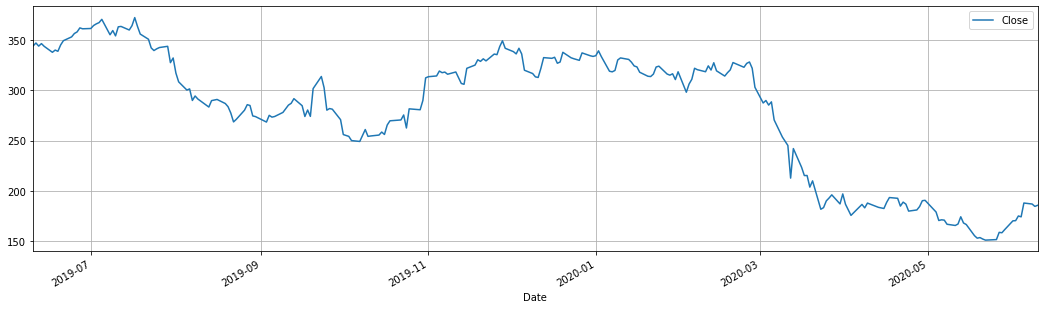

In [10]:
df_1.plot(kind="line",figsize=(18,5),grid='on')
plt.show()

- Clearly the time series is not stationary, It is following a downward trend
- As we can see that till January the series had seasonal pattern but after that there is a sudden drop in the share price
  this is may be because of the situation of COVID-19. But we can see that the series is gradually increasing and we can 
  forecast for that

In [11]:
df_2=pd.Series(df_1.Close)

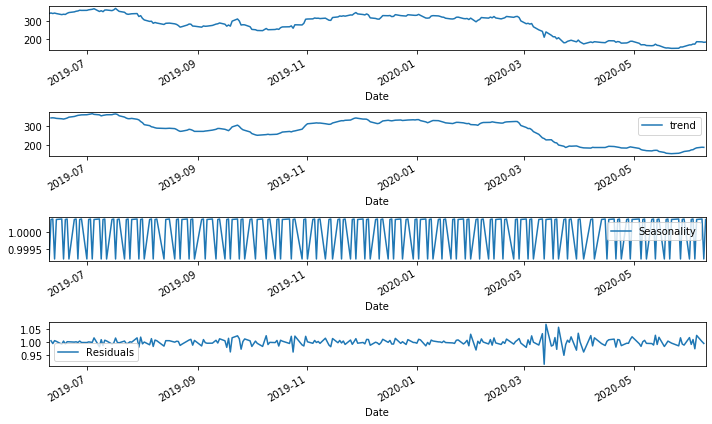

In [12]:
# Decomposing the series
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df_2,model='multiplicative', freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df_2.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- From the above graph, we can see that the general trend of the series is downward
- One can consider that the series is gradually increasing and the share price can increase in the future
- It is not seasonal, as you can see that the seasonal component looks quite ugly. The residuals’ variance seems to      increase through time, showing that the series exhibits more random behavior at the end.

In [13]:
train=df_2[0:186]
test=df_2[186:]

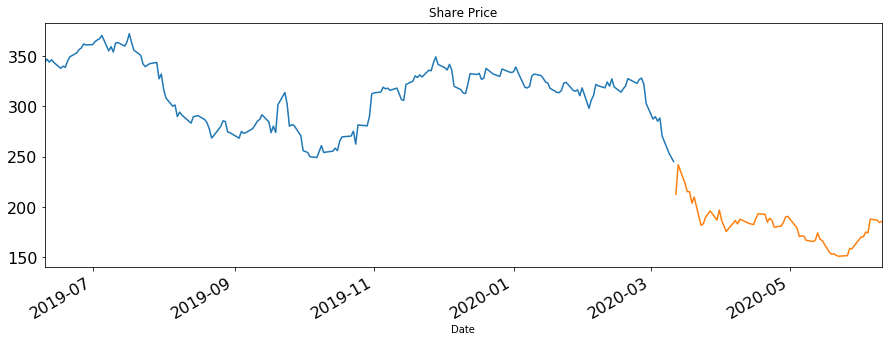

In [14]:
train.plot(figsize=(15,5), title= 'Share Price', fontsize=16,sharey=True)
test.plot(figsize=(15,5), title= 'Share Price', fontsize=16,sharey=True)
#plt.show()

In [15]:
df.shape

(246, 1)

In [16]:
"""
Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.
Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and 
better expose the structure of the underlying causal processes.
"""

'\nMoving average can be used as a data preparation technique to create a smoothed version of the original dataset.\nSmoothing is useful as a data preparation technique as it can reduce the random variation in the observations and \nbetter expose the structure of the underlying causal processes.\n'

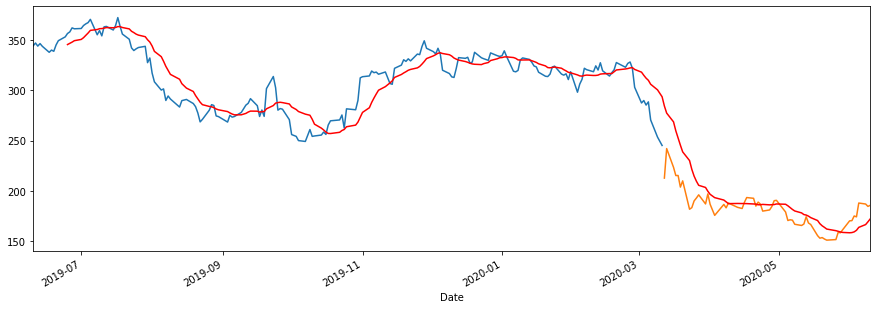

In [17]:
moving_avg =df_2.rolling(12).mean()
train.plot(kind="line",figsize=(15,5))
test.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

- The moving average of 12 month has able smooth down the series.

# Exponential Smoothing
- As we know the data has trend and seasonality to some extent, therefore triple exponntial smoothing will best suit the data

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(train)
fit1 = model.fit()
pred1 = fit1.forecast(59)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(59)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(59)

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


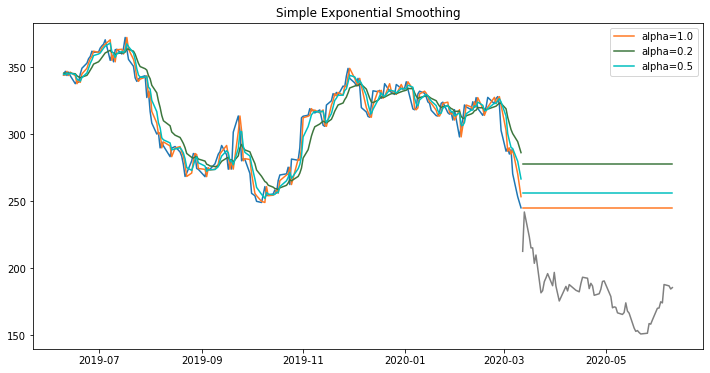

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[0:], train.values[0:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[0:], f.fittedvalues[0:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

In [20]:
# RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(np.sqrt(mean_squared_error(test,pred1)))
print(np.sqrt(mean_squared_error(test,pred2)))
print(np.sqrt(mean_squared_error(test,pred3)))

65.99201632190493
98.11971560348061
76.42355158406085


# Double Exponential Smoothing

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model = Holt(train)
fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(59)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(59)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(59)

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


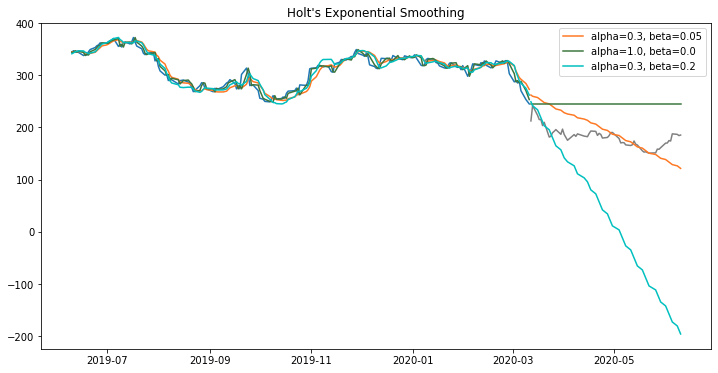

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[0:], train.values[0:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[0:], f.fittedvalues[0:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

In [23]:
# RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(np.sqrt(mean_squared_error(test,pred1)))
print(np.sqrt(mean_squared_error(test,pred2)))
print(np.sqrt(mean_squared_error(test,pred3)))

32.338283168886484
65.99201632190493
194.73328159410605


# Triple Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12) 

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
fit = model.fit()
pred = fit.forecast(59)
fit2 = model2.fit()
pred2 = fit2.forecast(59)
sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

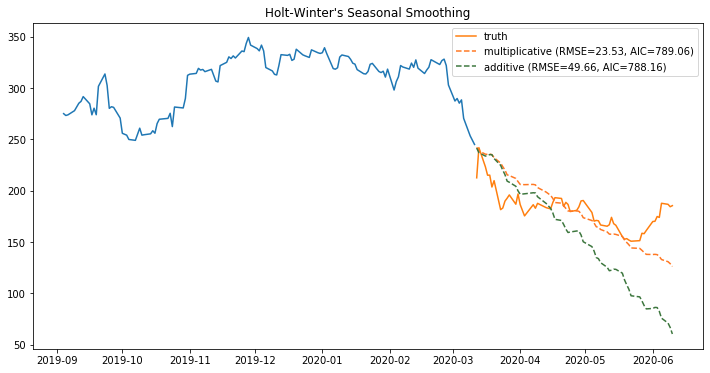

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[59:], train.values[59:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="multiplicative (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="additive (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)) 
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")

- The series is multiplicative in nature ..that is the trend and seasonality has to be multiplied

In [27]:
 # RMSE
print(sse1)
print(sse2)

23.532803626122718
49.65616268936134


- From triple exponential smoothing it is understood that there is seasonality of 12 days and it is multiplicative in nature
- there is trend as well which is also multiplicative in nature

# ARIMA MODEL

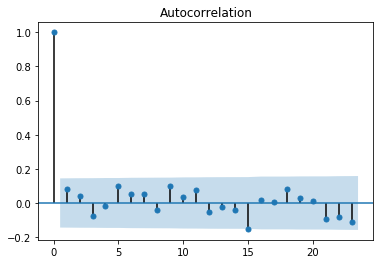

In [32]:
"""lets find order for AR part"""
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff1)
plt.show()

- the order for lag should be 11

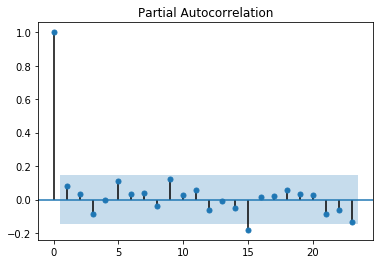

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff1)
plt.show()

- the order of MA term should be 1

In [34]:
"""
Rules for differencing: “ — Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it 
probably needs a higher order of differencing.
— Rule 2 : If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, 
the series may be overdifferenced.”
"""

'\nRules for differencing: “ — Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it \nprobably needs a higher order of differencing.\n— Rule 2 : If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,\nthen the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, \nthe series may be overdifferenced.”\n'

In [35]:
"""Lets Check for stationarity of the data"""
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_2)

Results of Dickey-Fuller Test:
Test Statistic                  -1.013343
p-value                          0.748367
#Lags Used                       7.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


- As we can see the timeseries is not stationary the p-value is greater then 0.05

In [36]:
"""Lets check for the stationarity of data after one differencing"""
diff1=train.diff()
diff1=diff1.dropna()
adf_test(diff1)

Results of Dickey-Fuller Test:
Test Statistic                -1.240610e+01
p-value                        4.448975e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.840000e+02
Critical Value (1%)           -3.466398e+00
Critical Value (5%)           -2.877380e+00
Critical Value (10%)          -2.575214e+00
dtype: float64


- After one differencing the series is stationary

In [37]:
"""Lets try these parameter in ARIMA model"""
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  185
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.079
Method:                       css-mle   S.D. of innovations              7.452
Date:                Thu, 09 Jul 2020   AIC                           1276.157
Time:                        14:16:46   BIC                           1289.039
Sample:                             1   HQIC                          1281.378
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5404      0.605     -0.893      0.373      -1.726       0.645
ar.L1.D.Close     0.2200      0.529      0.416      0.678      -0.818       1.257
ma.L1.D.Close    -0.1385      0.533     

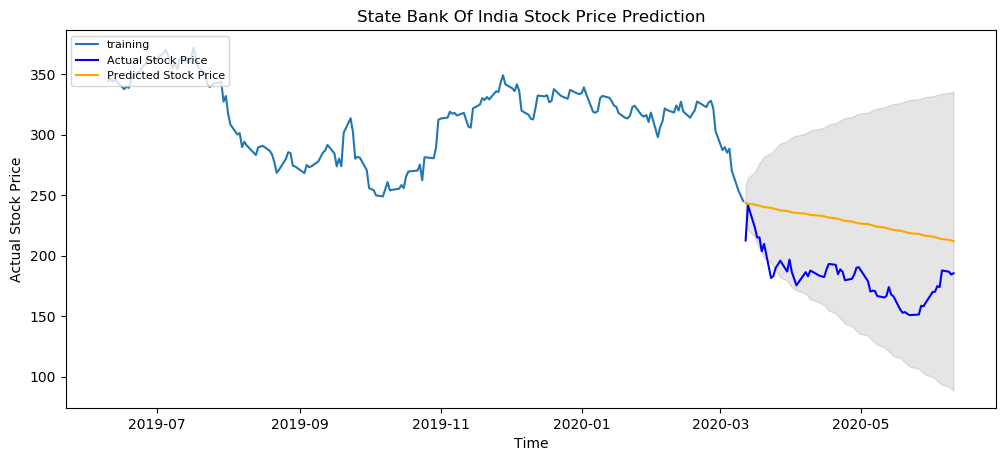

In [38]:
# Forecast
fc, se, conf = fitted.forecast(59, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('State Bank Of India Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
# report performance
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = np.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 2300.647375275632
MAE: 46.10798651156077
RMSE: 47.96506411207674
MAPE: 0.2624915909856681


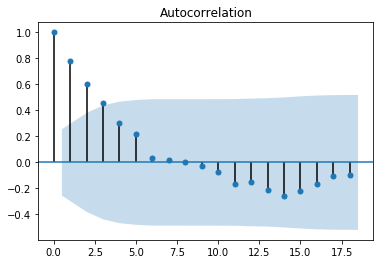

In [40]:
residual=test-fc
plot_acf(residual)
plt.show()

In [41]:
"""As in the series there is trend and seasonality it would be right to apply SARIMAX model"""
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,30),enforce_stationary=False,enforce_invertiblity=False)
results = model.fit()
print(results.summary())

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -559.337
Date:                            Thu, 09 Jul 2020   AIC                           1128.674
Time:                                    14:17:34   BIC                           1143.891
Sample:                                         0   HQIC                          1134.855
                                            - 186                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8780      0.239      3.676      0.000       0.410       1.346
ma.L1         -0.8159      0.274   

In [42]:
pred = results.predict(start=0,dynamic=False)

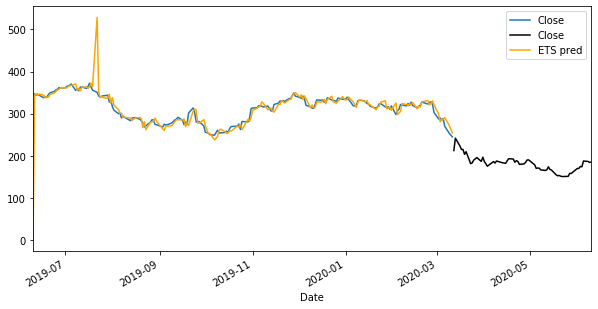

In [43]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
pred.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

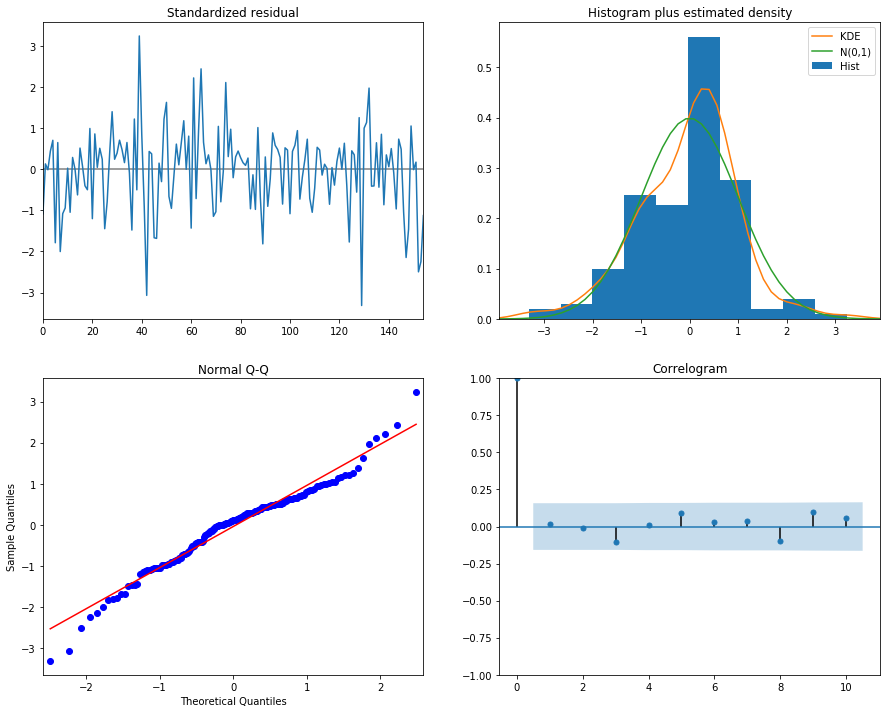

In [44]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [45]:
ft = results.forecast(59)
#ft

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


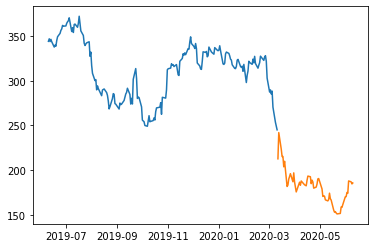

In [46]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
#plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [50]:
mse = mean_squared_error(test, ft)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, ft)
print('MAE: '+str(mae))
rmse = np.sqrt(mean_squared_error(test, ft))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(ft - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 651.3058994763427
MAE: 23.360802508279868
RMSE: 25.52069551317798
MAPE: nan


In [48]:
#test

In [ ]:
#fc